<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Adaboost_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [133]:
df=pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [134]:
### first step: deciding weights
df['weights']=1/df.shape[0]
###
alpha_log={}

In [135]:
def get_error_alpha(df,classifier):
    df['y_pred']=classifier.predict(df[['X1','X2']])
    df.loc[df['y_pred']!=df['label'],'flag']="False"
    errors=df.iloc[df[df['flag']=='False'].index.values]['weights'].sum()
    alpha=(1/2)*np.log((1-errors)/errors+0.0001)
    alpha_log[classifier]=alpha
    df.loc[df['y_pred']==df['label'],'new_weights']=df.loc[df['y_pred']==df['label'],'weights']*np.exp(-alpha)
    df.loc[df['y_pred']!=df['label'],'new_weights']=df.loc[df['y_pred']!=df['label'],'weights']*np.exp(alpha)
    print(df['weights'].sum())
    df['normalised_weights']=df['new_weights']/df['new_weights'].sum()
    df['range_upper']=np.cumsum(df['normalised_weights'])
    df['range_lower']=df['range_upper']-df['normalised_weights']
    return df

In [136]:
def get_new_datset(df):
    df_new=df[['X1','X2','label','weights','range_lower','range_upper']]
    indices=[]
    for i in range(df_new.shape[0]):
        a=np.random.random()
        for j,k in df_new.iterrows():
            if k['range_upper']>a and k['range_lower']<a:
                indices.append(j)

    df_new_subbset=df_new.iloc[indices,[0,1,2,3]]

    return df_new_subbset



In [137]:
### decision stumps:
clf1=DecisionTreeClassifier(max_depth=1)
clf1.fit(df[['X1','X2']],df['label'])
dataset_for_second_tree=get_new_datset(get_error_alpha(df,clf1))
clf2=DecisionTreeClassifier(max_depth=1)
clf2.fit(dataset_for_second_tree[['X1','X2']],dataset_for_second_tree['label'])
dataset_for_third_tree=get_new_datset(get_error_alpha(dataset_for_second_tree,clf2))
clf3=DecisionTreeClassifier(max_depth=1)
clf3.fit(dataset_for_third_tree[['X1','X2']],dataset_for_third_tree['label'])
dataset_for_fourth_tree=get_new_datset(get_error_alpha(dataset_for_third_tree,clf3))

1.0
1.0
1.0


In [138]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

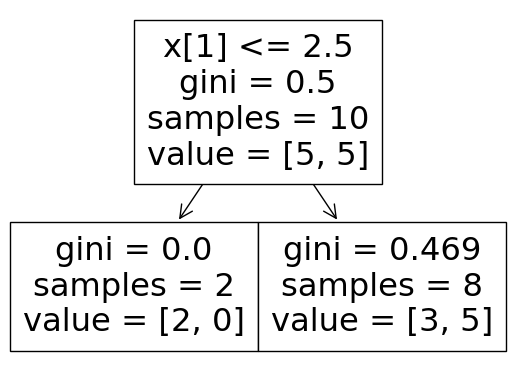

In [139]:
plot_tree(clf1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

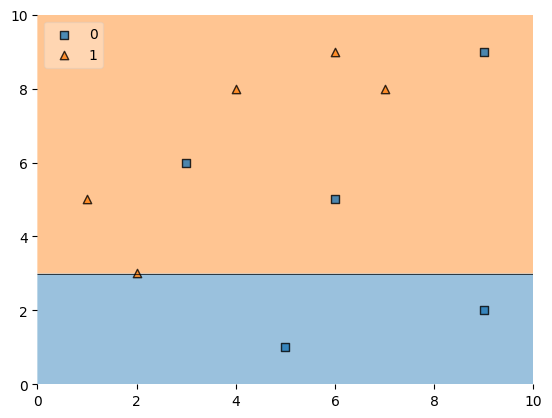

In [140]:
plot_decision_regions(df[['X1','X2']].values, df['label'].values, clf=clf1, legend=2)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]')]

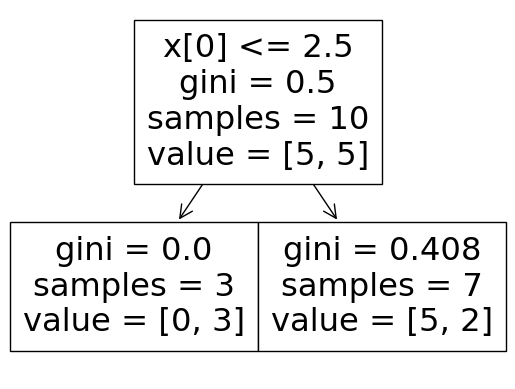

In [141]:
plot_tree(clf2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

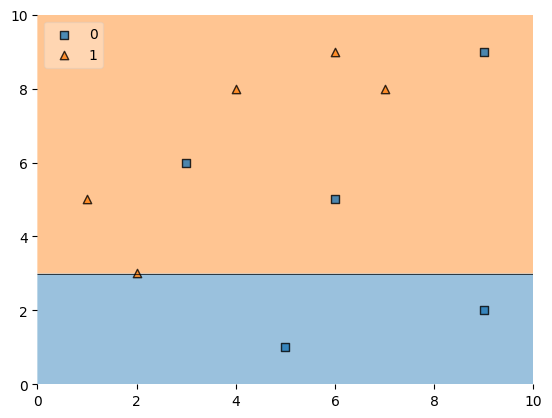

In [142]:
plot_decision_regions(df[['X1','X2']].values, df['label'].values, clf=clf1, legend=2)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]')]

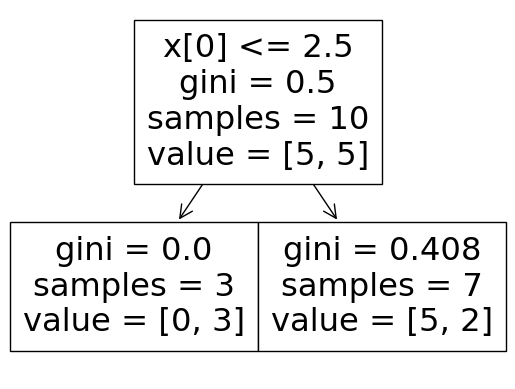

In [143]:
plot_tree(clf2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

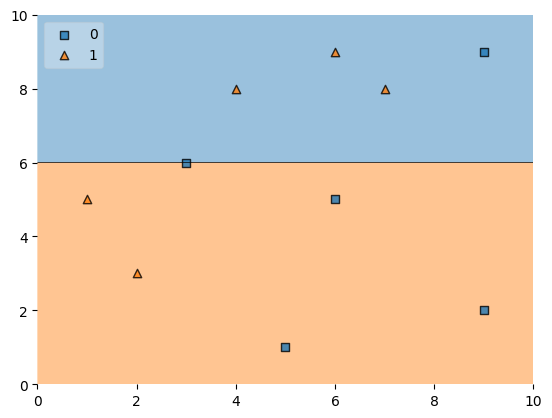

In [144]:
plot_decision_regions(df[['X1','X2']].values, df['label'].values, clf=clf3, legend=2)

### Predict

In [158]:
query = np.array([1,5]).reshape(1,2)
classifier_dic_predic={}

In [163]:
classifier_dic_predic[clf1]=clf1.predict(query)[0] ## all prediction are 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [164]:
classifier_dic_predic[clf2]=clf2.predict(query)[0]## all prediction are 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [165]:
classifier_dic_predic[clf3]=clf3.predict(query)[0]## all prediction are 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [149]:
alpha_log

{DecisionTreeClassifier(max_depth=1): 0.4236703583058598,
 DecisionTreeClassifier(max_depth=1): 0.6931596804036979,
 DecisionTreeClassifier(max_depth=1): 1.0986178441928012}

In [166]:
classifier_dic_predic

{DecisionTreeClassifier(max_depth=1): 1,
 DecisionTreeClassifier(max_depth=1): 1,
 DecisionTreeClassifier(max_depth=1): 1}

In [173]:
sum0=0
for key,value in alpha_log.items():
    sum0+=classifier_dic_predic.get(key,1)*value
np.sign(sum0)

1.0

In [171]:
sum0

2.215447882902359